# Question 1

## Q1.1 generate data:
(a) $X=\left[-1, -0.99, -0.98, \ldots, 0.98, 0.99, 1\right]$ 
 
(b) $Y = 2\cdot X$
 
(c) write a function noise_var(v) which receives an array and adds **to each element** a sample from a normal distribution with mean 0 and variance 0.01. 

(d) using the function you wrote in clause (c) generate $X'$. Where $X'$ is a vector defined as following:
- for all $x_i\in X, x'_i\in X'$
- $ x'_i=x_i+n_i $ 
- $n_i\sim \mathcal{N}\left(0, 0.01\right)$ 

(d) Repeat the same process as in (d) to create $Y'$

In [19]:
import numpy as np
import math

def noise_var(y):   
    v = np.random.normal(0,math.sqrt(.01), len(x))
    return y + v

x = np.arange(-1,1.01, .01)
y = 2 * x
xprime = noise_var(x)
yprime = noise_var(y)

## Q1.2
Are $X'$ and $Y'$ statistically dependent? what type of dependence? how can you show that? 

1. explain in words
2. show with math (in code)


*hint - most mathematical operations you encounter are already implemented in the Python libraries you know. Use them.*

In [22]:
## X' and Y' are almost fully dependent because Y is 2*X but not fully dependent because 
## they add a number where the mean is 0 with S.D of 0.01. 
## The type of dependency is linear (2*X is linear).

from scipy.stats.stats import pearsonr
pearsonr(xprime, yprime)

(0.9831773508801143, 6.656219086502529e-149)

# Question 2


Load the data in movie_rating.csv into a dataframe. The data consists of critic ratings and people votes for a set of 20 movies.
## Q2.1
Compute the linear correlation between critic ratings and people votes


*hint - most mathematical operations you encounter are already implemented in the Python libraries you know. Use them.*

In [52]:
import pandas as pd

movie = pd.read_csv("movie_rating.csv")
people = movie['people_vote']
rating = movie['rating']
movie_correlation = pearsonr(people, rating)
print(movie_correlation)

(0.33695346478287086, 0.14629113411365588)


## Q2.2
(a) To explore the connection between critic ratings and people votes, draw them against each other in a scatter plot. 

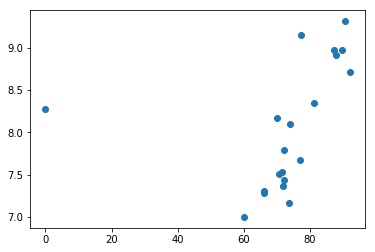

In [39]:
import matplotlib.pyplot as plt

plt.scatter(people, rating)
plt.show()

(b) Create a new data frame, with all the movies, except the one with the lowest people vote. 

In [48]:
movies2 = movie[movie['people_vote'] > 0]

(c) Draw a scatter plot for the movies selected. Is there a linear connection? Explain.

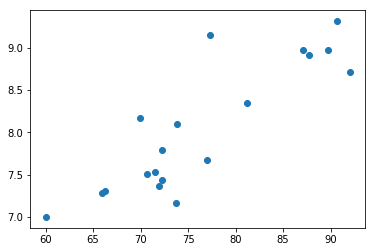

(0.8609465459222103, 2.2256804373534285e-06)


In [54]:
plt.scatter(movies2['people_vote'], movies2['rating'])
plt.show()
people2 = movies2['people_vote']
rating2 = movies2['rating']
movie_correlation2 = pearsonr(people2, rating2)
print(movie_correlation2)

## There is a correlation as we see the value of the correlation function is now .86
## which is pretty strong

(d) Congragulations you've encountered an outlier, a data point so far from the others, keeping it may adversely affect results. 
Linear correlation is sensitive to distance. Handling outliers is important and most cases are harder than this one, due to complexity (hunderds of variables), size (thousands of movies), etc. In this case a possible remedy would be to use order statistics or ranks (1st, 2nd,...).

$$
\small
X=\{100,0, 15, 50\}
\rightarrow
rank(X)=\{4, 1, 2, 3\}
$$

- Create a new data frame for all movies with all critic ratings replaced by their rank and the same for people vote. 
- Draw a scatter plot
- compute the linear correlation.

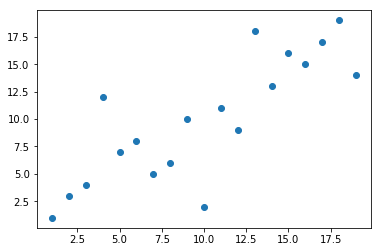

(0.8609465459222103, 2.2256804373534285e-06)


In [92]:
people_rank = people2.rank()
people_rank = people_rank.rename("people_rank")
rating_rank = rating2.rank()
rating_rank = rating_rank.rename("rating_rank")
ranked_frame = pd.DataFrame(index=[people_rank,rating_rank])
plt.scatter(people_rank, rating_rank)
plt.show()
rating_correlation = pearsonr(people2, rating2)
print(rating_correlation)

Correlation over ranks is named Spearman correlation.

# Question 3
Read the csv file bank-full.csv into a data frame. The description
of this data can be found in bank-info.txt

(a) Compute the Spearman correlation between days from last contact and previous campaign contacts

In [119]:
blank_df = pd.read_csv("bank-full.csv")
blank_df = blank_df[blank_df.days_from_last_contact != -1]
days_from_last_contact = blank_df['days_from_last_contact']
days_from_last_contact_rank = days_from_last_contact.rank()
days_from_last_contact_rank = days_from_last_contact_rank.rename("days_from_last_contact_rank")
previous_campaign_contacts = blank_df['previous_campaign_contacts']
previous_campaign_contacts_rank = previous_campaign_contacts.rank()
previous_campaign_contacts_rank = previous_campaign_contacts_rank.rename("previous_campaign_contacts_rank")
rating_correlation = pearsonr(days_from_last_contact_rank, previous_campaign_contacts_rank)
print(rating_correlation)

(-0.10127327886194193, 2.839971779114998e-20)


(b) Is there an actual linear correlation between the ranks? Explain, and back your claims with math and plots. 

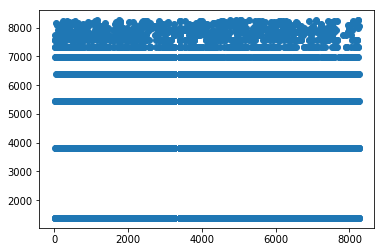

In [121]:
plt.scatter(days_from_last_contact_rank, previous_campaign_contacts_rank)
plt.show()

## There is no linear correlation. We see the x-values in the graph have nothing to do with the y-values and the 
## correlation function gives us -.1 which indicates no correlation